## Predictive Modeling
*for Loan Default Prediction project*

#### Load Packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix

import seaborn as sns

from pycaret.classification import * 

import locale
locale.setlocale( locale.LC_ALL, '' )

'English_United States.1252'

#### Load Data

In [2]:
# Data loaded from Exploratory Data Analysis Notebook
df = pd.read_csv('Data/final_dataset.csv')
df

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,application_type,fico,months_cr_line,ROI
0,3600.0,36 months,123.03,3,10.0,MORTGAGE,55000.0,Not Verified,1,debt_consolidation,PA,5.91,0.0,1.0,7.0,0.0,2765.0,29.7,13.0,4421.723917,Individual,677.0,148,821.723917
1,24700.0,36 months,820.28,3,10.0,MORTGAGE,65000.0,Not Verified,1,small_business,SD,16.06,1.0,4.0,22.0,0.0,21470.0,19.2,38.0,25679.660000,Individual,717.0,192,979.660000
2,20000.0,60 months,432.66,2,10.0,MORTGAGE,63000.0,Not Verified,1,home_improvement,IL,10.78,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,22705.924294,Joint App,697.0,183,2705.924294
3,10400.0,60 months,289.91,6,3.0,MORTGAGE,104433.0,Source Verified,1,major_purchase,PA,25.37,1.0,3.0,12.0,0.0,21929.0,64.5,35.0,11740.500000,Individual,697.0,210,1340.500000
4,11950.0,36 months,405.18,3,4.0,RENT,34000.0,Source Verified,1,debt_consolidation,GA,10.20,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,13708.948530,Individual,692.0,338,1758.948530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156767,18000.0,60 months,377.95,2,5.0,OWN,130000.0,Not Verified,1,home_improvement,TX,20.59,0.0,1.0,17.0,0.0,23833.0,34.0,39.0,20756.233632,Individual,737.0,147,2756.233632
1156768,29400.0,60 months,683.94,3,9.0,MORTGAGE,180792.0,Not Verified,1,debt_consolidation,CA,22.03,0.0,1.0,16.0,0.0,77480.0,85.2,32.0,35848.764532,Individual,707.0,175,6448.764532
1156769,32000.0,60 months,752.74,3,3.0,MORTGAGE,157000.0,Source Verified,0,home_improvement,AZ,10.34,0.0,0.0,14.0,0.0,111598.0,27.4,18.0,3737.940000,Individual,737.0,64,-28262.060000
1156770,16000.0,60 months,362.34,3,10.0,RENT,150000.0,Not Verified,1,medical,NC,12.25,0.0,0.0,12.0,4.0,7700.0,55.0,28.0,18660.607569,Individual,667.0,230,2660.607569


### Prepare Data

To account for the unbalanced dataset, I undersample the majority class for the data used in modeling. I take a 5 representative samples for the hold out, test data.

In [3]:
model_data, test_data = train_test_split(df, test_size=500000)
test_data, test_data_b = train_test_split(test_data, test_size=400000)
test_data_b, test_data_c = train_test_split(test_data_b, test_size=300000)
test_data_c, test_data_d = train_test_split(test_data_c, test_size=200000)
test_data_d, test_data_e = train_test_split(test_data_d, test_size=100000)
model_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)
test_data_b.reset_index(inplace=True, drop=True)
test_data_c.reset_index(inplace=True, drop=True)
test_data_d.reset_index(inplace=True, drop=True)
test_data_e.reset_index(inplace=True, drop=True)

pos_model_data = model_data[model_data['loan_status']==1]
neg_model_data = model_data[model_data['loan_status']==0]

pos_model_data_sample = pos_model_data.sample(n=100000)
neg_model_data_sample = neg_model_data.sample(n=100000)

model_data = pd.concat([pos_model_data_sample, neg_model_data_sample])

print('Model Data: ', model_data.shape, 'Fully Paid: ',\
      model_data[model_data['loan_status']==1].shape[0]/model_data.shape[0])
print('Test Data: ', test_data.shape, 'Fully Paid: ',\
      test_data[test_data['loan_status']==1].shape[0]/test_data.shape[0])
print('Test Data B: ', test_data_b.shape, 'Fully Paid: ',\
      test_data_b[test_data_b['loan_status']==1].shape[0]/test_data_b.shape[0])
print('Test Data C: ', test_data_c.shape, 'Fully Paid: ',\
      test_data_c[test_data_c['loan_status']==1].shape[0]/test_data_c.shape[0])
print('Test Data D: ', test_data_d.shape, 'Fully Paid: ',\
      test_data_d[test_data_d['loan_status']==1].shape[0]/test_data_d.shape[0])
print('Test Data E: ', test_data_e.shape, 'Fully Paid: ',\
      test_data_e[test_data_e['loan_status']==1].shape[0]/test_data_e.shape[0])

Model Data:  (200000, 24) Fully Paid:  0.5
Test Data:  (100000, 24) Fully Paid:  0.80414
Test Data B:  (100000, 24) Fully Paid:  0.80433
Test Data C:  (100000, 24) Fully Paid:  0.8052
Test Data D:  (100000, 24) Fully Paid:  0.80524
Test Data E:  (100000, 24) Fully Paid:  0.80642


### Preprocessing / Modeling

Some variables in the dataset have outliers, skew, and need to be normalized. Here I experiment with different preprocessing steps to address these issues. Then test the impact when training on 4 of the top models found in previous experimentation.

In [5]:
clf1 = setup(data = model_data,
             target = 'loan_status',
             session_id = 1,
             ignore_features=['ROI', 'total_pymnt', 'addr_state']
            )

,Description,Value
0,session_id,1
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(200000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model1 = compare_models(include=['xgboost', 'catboost', 'lightgbm', 'gbc'], fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6563,0.7150,0.6424,0.6603,0.6512,0.3125,0.3126,26.0767
lightgbm,Light Gradient Boosting Machine,0.6555,0.7137,0.6374,0.6609,0.6489,0.3109,0.3111,1.3533
gbc,Gradient Boosting Classifier,0.6538,0.7125,0.6242,0.6630,0.6430,0.3075,0.3081,13.8267
xgboost,Extreme Gradient Boosting,0.6501,0.7063,0.6354,0.6542,0.6447,0.3002,0.3003,10.7300


In [8]:
clf2 = setup(data = model_data,
             target = 'loan_status',
             session_id = 2,
             ignore_features=['ROI', 'total_pymnt', 'addr_state'],
             numeric_features=['grade']
            )

,Description,Value
0,session_id,2
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(200000, 24)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best_model2 = compare_models(include=['xgboost', 'catboost', 'lightgbm', 'gbc'], fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6552,0.7147,0.6415,0.6607,0.6509,0.3105,0.3106,25.7000
lightgbm,Light Gradient Boosting Machine,0.6546,0.7140,0.6405,0.6602,0.6502,0.3093,0.3095,1.2900
gbc,Gradient Boosting Classifier,0.6536,0.7126,0.6354,0.6605,0.6477,0.3073,0.3076,13.3367
xgboost,Extreme Gradient Boosting,0.6493,0.7053,0.6371,0.6540,0.6455,0.2986,0.2987,8.6900


In [10]:
clf3 = setup(data = model_data,
             target = 'loan_status',
             session_id = 3,
             ignore_features=['ROI', 'total_pymnt', 'addr_state'],
             numeric_features=['grade'],
             normalize=True
            )

,Description,Value
0,session_id,3
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(200000, 24)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best_model3 = compare_models(include=['xgboost', 'catboost', 'lightgbm', 'gbc'], fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6567,0.7150,0.6412,0.6608,0.6508,0.3133,0.3134,24.8233
lightgbm,Light Gradient Boosting Machine,0.6545,0.7130,0.6362,0.6595,0.6476,0.3090,0.3092,1.3067
gbc,Gradient Boosting Classifier,0.6533,0.7111,0.6322,0.6591,0.6454,0.3066,0.3068,13.1867
xgboost,Extreme Gradient Boosting,0.6494,0.7063,0.6361,0.6525,0.6442,0.2987,0.2988,10.5400


In [12]:
clf4 = setup(data = model_data,
             target = 'loan_status',
             session_id = 4,
             ignore_features=['ROI', 'total_pymnt', 'addr_state'],
             numeric_features=['grade'],
             normalize=True,
             remove_outliers=True
            )

,Description,Value
0,session_id,4
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(200000, 24)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
best_model4 = compare_models(include=['xgboost', 'catboost', 'lightgbm', 'gbc'], fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6561,0.7151,0.6394,0.6619,0.6505,0.3121,0.3123,23.7100
lightgbm,Light Gradient Boosting Machine,0.6551,0.7140,0.6355,0.6620,0.6485,0.3103,0.3106,1.2667
gbc,Gradient Boosting Classifier,0.6551,0.7130,0.6346,0.6623,0.6481,0.3102,0.3105,12.9867
xgboost,Extreme Gradient Boosting,0.6503,0.7067,0.6350,0.6555,0.6451,0.3006,0.3008,7.5567


In [14]:
clf5 = setup(data = model_data,
             target = 'loan_status',
             session_id = 5,
             ignore_features=['ROI', 'total_pymnt', 'addr_state'],
             numeric_features=['grade'],
             normalize=True,
             transformation=True,
             remove_outliers=True,
             ignore_low_variance=True
            )

,Description,Value
0,session_id,5
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(200000, 24)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best_model5 = compare_models(include=['xgboost', 'catboost', 'lightgbm', 'gbc'], fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6560,0.7146,0.6414,0.6609,0.6510,0.3120,0.3121,23.3000
lightgbm,Light Gradient Boosting Machine,0.6542,0.7127,0.6364,0.6602,0.6481,0.3085,0.3087,1.3867
gbc,Gradient Boosting Classifier,0.6540,0.7119,0.6344,0.6605,0.6472,0.3080,0.3083,12.8167
xgboost,Extreme Gradient Boosting,0.6472,0.7038,0.6353,0.6511,0.6431,0.2945,0.2946,7.4033


In [16]:
clf6 = setup(data = model_data,
             target = 'loan_status',
             session_id = 5,
             ignore_features=['ROI', 'total_pymnt', 'addr_state'],
             numeric_features=['grade'],
             normalize=True,
             transformation=True,
             remove_outliers=True
            )

,Description,Value
0,session_id,5
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(200000, 24)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
best_model6 = compare_models(include=['xgboost', 'catboost', 'lightgbm', 'gbc'], fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6555,0.7145,0.6411,0.6602,0.6505,0.3109,0.3111,25.3633
lightgbm,Light Gradient Boosting Machine,0.6549,0.7132,0.6375,0.6606,0.6489,0.3098,0.3100,1.2967
gbc,Gradient Boosting Classifier,0.6538,0.7121,0.6337,0.6603,0.6467,0.3076,0.3078,11.5867
xgboost,Extreme Gradient Boosting,0.6489,0.7047,0.6375,0.6525,0.6449,0.2977,0.2978,12.3167


The CatBoost Classifier with normalization, removal of outliers, and changing grade to numeric gave the best results.

### CatBoost Classifier

Now I will train the CatBoost Classifier from scratch with optimal preprocessing steps and then tune to optimize for AUC.

In [6]:
clf = setup(data = model_data,
             target = 'loan_status',
             session_id = 4,
             ignore_features=['ROI', 'total_pymnt', 'addr_state'],
             numeric_features=['grade'],
             normalize=True,
             remove_outliers=True
            )

catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6602,0.7148,0.6414,0.6666,0.6537,0.3205,0.3207
1,0.6556,0.7169,0.6352,0.6623,0.6485,0.3113,0.3115
2,0.6547,0.7166,0.6315,0.6624,0.6466,0.3095,0.3098
3,0.6529,0.7130,0.6312,0.6599,0.6452,0.3057,0.3060
4,0.6529,0.7129,0.6247,0.6622,0.6429,0.3059,0.3064
5,0.6568,0.7161,0.6335,0.6646,0.6487,0.3135,0.3139
6,0.6603,0.7196,0.6467,0.6649,0.6557,0.3206,0.3207
7,0.6559,0.7184,0.6365,0.6624,0.6492,0.3119,0.3121
8,0.6580,0.7175,0.6398,0.6641,0.6517,0.3159,0.3162
9,0.6592,0.7149,0.6389,0.6661,0.6522,0.3185,0.3187


Nice, even better AUC. Let's tune her up making sure to optimize for AUC instead of accuracy.

In [7]:
tuned_catboost = tune_model(catboost, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6614,0.7154,0.6387,0.6692,0.6536,0.3229,0.3232
1,0.6568,0.7169,0.6343,0.6642,0.6489,0.3135,0.3139
2,0.6518,0.7170,0.6247,0.6606,0.6421,0.3036,0.3041
3,0.6549,0.7132,0.6295,0.6632,0.6459,0.3098,0.3102
4,0.6525,0.7135,0.6225,0.6623,0.6418,0.3050,0.3055
5,0.6542,0.7152,0.6320,0.6615,0.6464,0.3084,0.3087
6,0.6602,0.7199,0.6410,0.6668,0.6536,0.3205,0.3207
7,0.6568,0.7189,0.6344,0.6644,0.6490,0.3137,0.3140
8,0.6573,0.7165,0.6315,0.6660,0.6483,0.3146,0.3150
9,0.6587,0.7150,0.6346,0.6668,0.6503,0.3174,0.3178


Now we will make predictions on the first hold out test data set.

In [8]:
predictions = predict_model(tuned_catboost, data=test_data, probability_threshold=0.5, raw_score=True)

AUC:  0.6559317498401404
Accuracy:  0.64053
Precision:  0.8903832985092971
Recall:  0.6306115850473798


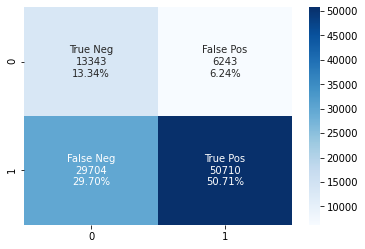

In [9]:
def report(actual, predicted):
    """
    Reference: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    """
    AUC = roc_auc_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    print('AUC: ', AUC)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    conf_matrix = confusion_matrix(actual, predicted)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
    return

report(predictions['loan_status'], predictions['Label'])

In [10]:
comp_df = pd.DataFrame({'Actual': predictions['loan_status'].astype(float), 'Predicted': predictions['Score_1']})

bounds = []
interval_totals = []
paid_totals = []
for bound in range(0,100,5):
    upper = (bound+5)/100
    lower = bound/100
    interval = comp_df[(comp_df['Predicted'] >= lower) & (comp_df['Predicted'] < upper)]
    bounds.append('{:.2f}-{:.2f}'.format(lower, upper))
    paid_totals.append(interval[interval['Actual'] == 1.0].shape[0])
    interval_totals.append(interval.shape[0])
    
comp_plot_df = pd.DataFrame({'Probability': bounds, 'Interval Total': interval_totals, 'Paid in Full': paid_totals})
comp_plot_df['Charged Off'] = comp_plot_df['Interval Total'] - comp_plot_df['Paid in Full']
comp_plot_df['Paid In Full Rate'] = comp_plot_df['Paid in Full'] / comp_plot_df['Interval Total']
comp_plot_df

,Probability,Interval Total,Paid in Full,Charged Off,Paid In Full Rate
0,0.00-0.05,1,0,1,0.000000
1,0.05-0.10,40,11,29,0.275000
2,0.10-0.15,508,193,315,0.379921
3,0.15-0.20,2074,934,1140,0.450338
4,0.20-0.25,3684,2022,1662,0.548860
5,0.25-0.30,5035,3128,1907,0.621251
6,0.30-0.35,6237,4126,2111,0.661536
7,0.35-0.40,7590,5447,2143,0.717655
8,0.40-0.45,8677,6524,2153,0.751873
9,0.45-0.50,9190,7311,1879,0.795539


### Blend Models

Another option in PyCaret is to use a blended model that considers predictions from each of several models and using a concensus among the different models to generate final predictions. I will check to see if a better AUC can be achieved with this method.

In [23]:
clf = setup(data = model_data,
             target = 'loan_status',
             session_id = 4,
             ignore_features=['ROI', 'total_pymnt', 'addr_state'],
             numeric_features=['grade'],
             normalize=True,
             remove_outliers=True
            )

lightgbm = create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm, optimize='AUC')
xgboost = create_model('xgboost')
tuned_xgboost = tune_model(xgboost, optimize='AUC')
blender_specific = blend_models(estimator_list = [tuned_catboost, tuned_lightgbm, tuned_xgboost], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6256,0.7153,0.8393,0.5880,0.6915,0.2511,0.2777
1,0.6274,0.7164,0.8375,0.5898,0.6921,0.2548,0.2808
2,0.6273,0.7180,0.8403,0.5893,0.6928,0.2545,0.2814
3,0.6267,0.7138,0.8349,0.5895,0.6911,0.2533,0.2786
4,0.6278,0.7147,0.8403,0.5897,0.6931,0.2556,0.2824
5,0.6208,0.7164,0.8357,0.5845,0.6879,0.2414,0.2674
6,0.6332,0.7204,0.8489,0.5931,0.6983,0.2662,0.2951
7,0.6327,0.7206,0.8449,0.5933,0.6971,0.2653,0.2930
8,0.6264,0.7168,0.8346,0.5893,0.6908,0.2527,0.2779
9,0.6251,0.7145,0.8363,0.5880,0.6905,0.2501,0.2759


In [24]:
tuned_blender = tune_model(blender_specific, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6380,0.7155,0.7832,0.6070,0.6839,0.2759,0.2883
1,0.6427,0.7168,0.7803,0.6120,0.6860,0.2854,0.2968
2,0.6426,0.7181,0.7836,0.6112,0.6868,0.2851,0.2972
3,0.6413,0.7138,0.7824,0.6102,0.6857,0.2825,0.2945
4,0.6477,0.7147,0.7889,0.6152,0.6913,0.2953,0.3078
5,0.6380,0.7165,0.7793,0.6077,0.6829,0.2760,0.2877
6,0.6494,0.7205,0.7959,0.6157,0.6942,0.2987,0.3124
7,0.6470,0.7205,0.7870,0.6149,0.6904,0.2939,0.3062
8,0.6417,0.7168,0.7822,0.6108,0.6859,0.2834,0.2953
9,0.6399,0.7149,0.7820,0.6090,0.6847,0.2797,0.2918


AUC:  0.6447483832079841
Accuracy:  0.72792
Precision:  0.8670493115152184
Recall:  0.7814808366702316


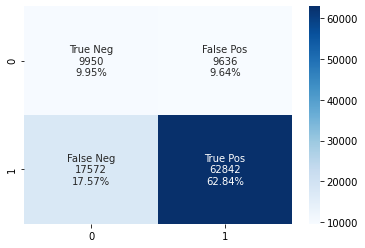

In [27]:
predictions = predict_model(tuned_blender, data=test_data, probability_threshold=0.5, raw_score=True)

def report(actual, predicted):
    """
    Reference: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    """
    AUC = roc_auc_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    print('AUC: ', AUC)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    conf_matrix = confusion_matrix(actual, predicted)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
    return

report(predictions['loan_status'], predictions['Label'])

In [28]:
comp_df = pd.DataFrame({'Actual': predictions['loan_status'].astype(float), 'Predicted': predictions['Score_1']})

bounds = []
interval_totals = []
paid_totals = []
for bound in range(0,100,5):
    upper = (bound+5)/100
    lower = bound/100
    interval = comp_df[(comp_df['Predicted'] >= lower) & (comp_df['Predicted'] < upper)]
    bounds.append('{:.2f}-{:.2f}'.format(lower, upper))
    paid_totals.append(interval[interval['Actual'] == 1.0].shape[0])
    interval_totals.append(interval.shape[0])
    
comp_plot_df = pd.DataFrame({'Probability': bounds, 'Interval Total': interval_totals, 'Paid in Full': paid_totals})
comp_plot_df['Charged Off'] = comp_plot_df['Interval Total'] - comp_plot_df['Paid in Full']
comp_plot_df['Paid In Full Rate'] = comp_plot_df['Paid in Full'] / comp_plot_df['Interval Total']
comp_plot_df

,Probability,Interval Total,Paid in Full,Charged Off,Paid In Full Rate
0,0.00-0.05,0,0,0,NaN
1,0.05-0.10,0,0,0,NaN
2,0.10-0.15,20,3,17,0.150000
3,0.15-0.20,263,98,165,0.372624
4,0.20-0.25,1030,434,596,0.421359
5,0.25-0.30,2296,1120,1176,0.487805
6,0.30-0.35,3660,2098,1562,0.573224
7,0.35-0.40,5182,3213,1969,0.620031
8,0.40-0.45,6689,4525,2164,0.676484
9,0.45-0.50,8374,6077,2297,0.725699


As it turns out, the sole Tuned Catboost Classifier is still the best option in terms of AUC on the test data.

### Applying the Model

To assess whether the model would be useful, we use the return on investment (ROI) calculated previously by subtracting the loan amount from the total payments received. This would be the return prior to any service fees taken out by the servicing company.  Further, remember we are only considering fully funded loans assuming one investor.  

We then can use the model probabilities to select loans for investment. The total investment would equal the sum of all the loan amounts selected. The return would equal the sum of the ROIs for each loan selected. If a loan was incorrectly predicted to be paid in full, the ROI would be negative, which would bring down the return. In each row of the table below, we would be selecting all loans that received a probability of being paid off greater than the specified value. The return we would have seen on the investment for each probability threshold is stated.

In [11]:
scores = []
investments = []
returns = []
return_percs = []

for score in range(70, 98, 1):
    score = score/100
    invested = sum(predictions[predictions['Score_1']>score]['loan_amnt'])
    ROI = sum(predictions[predictions['Score_1']>score]['ROI'])
    
    score_string = '> {:.2f}'.format(score)
    invested_string = '{}'.format(locale.currency(invested, grouping=True))
    ROI_string = '{}'.format(locale.currency(ROI, grouping=True), ROI/invested)
    ROI_percent_string = '{:.1%}'.format(ROI/invested)
    
    scores.append(score_string)
    investments.append(invested_string)
    returns.append(ROI_string)
    return_percs.append(ROI_percent_string)

    
    
return_df = pd.DataFrame({'Score': scores, 'Investment': investments, 'Return': returns, 'Return Percent': return_percs})
return_df

,Score,Investment,Return,Return Percent
0,> 0.70,"$300,674,000.00","$18,302,372.69",6.1%
1,> 0.71,"$283,895,600.00","$17,315,411.10",6.1%
2,> 0.72,"$266,867,925.00","$16,363,182.90",6.1%
3,> 0.73,"$250,864,550.00","$15,469,593.31",6.2%
4,> 0.74,"$235,323,250.00","$14,444,480.52",6.1%
5,> 0.75,"$220,936,150.00","$13,460,299.83",6.1%
6,> 0.76,"$205,830,575.00","$12,676,459.75",6.2%
7,> 0.77,"$191,177,150.00","$11,782,824.15",6.2%
8,> 0.78,"$176,389,650.00","$10,964,672.41",6.2%
9,> 0.79,"$160,921,150.00","$10,031,286.60",6.2%


These results had me thinking. The model is likely to predict the less profitable loans, those with high grades and fico scores, as being more probable to be paid in full. However, are there more profitable loans that the model had high probability on?  

We can determine a potential return on a loan pretty easily when we consider the monthly installments on the loan, the loan amount, and the term. We simply multiply the term by the monthly installments to get the total payments if the loan was not paid back early. Then we take the potential total payments and subtract the initial loan amount, or investment. The result is the return. If we divide the return by loan amount, we get the potential rate of return.  

All this would potentially be known to the investor at the loan origination and could be used to filter out potential loans to select from. Therefore, below I will use a grid search to find which model probability threshold and return potential threshold to use that generates the largest return rate.

In [12]:
mapping = {'term': {' 36 months':36.0, ' 60 months': 60.0}}
predictions = predictions.replace(mapping)
predictions['return_potential'] = ((predictions['term'] * predictions['installment'])\
                                     - predictions['loan_amnt'])/predictions['loan_amnt']
predictions.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,total_acc,total_pymnt,application_type,fico,months_cr_line,ROI,Label,Score_0,Score_1,return_potential
0,25000.0,60.0,509.07,2,2.0,RENT,100500.0,Not Verified,1,debt_consolidation,...,27.0,29996.475670,Individual,737.0,132,4996.475670,0,0.5423,0.4577,0.221768
1,25600.0,36.0,808.02,2,0.0,RENT,90000.0,Verified,1,credit_card,...,42.0,28305.197078,Individual,717.0,178,2705.197078,1,0.3886,0.6114,0.136278
2,7900.0,36.0,293.56,5,1.0,RENT,72000.0,Source Verified,1,debt_consolidation,...,23.0,10559.002563,Individual,667.0,169,2659.002563,0,0.7525,0.2475,0.337742
3,5000.0,36.0,163.11,2,10.0,MORTGAGE,37000.0,Source Verified,1,credit_card,...,32.0,5683.176135,Individual,672.0,396,683.176135,1,0.4517,0.5483,0.174392
4,21000.0,60.0,628.63,7,10.0,RENT,65000.0,Source Verified,0,debt_consolidation,...,7.0,23340.860000,Individual,672.0,138,2340.860000,0,0.8907,0.1093,0.796086


In [13]:
def grid_search(predictions):
    return_potentials = []
    model_scores = []
    investments = []
    returns = []
    return_perc = []
    loans = []
    for return_potential in range(0, 50, 5):
        return_potential = return_potential/100
        for score in range(0,101, 5):
            score = score/100
            num_loans = predictions[(predictions['Score_1']>score)&\
                                 (predictions['return_potential']>return_potential)].shape[0]
            invested = sum(predictions[(predictions['Score_1']>score)&\
                                         (predictions['return_potential']>return_potential)]['loan_amnt'])
            ROI = sum(predictions[(predictions['Score_1']>score)&\
                                    (predictions['return_potential']>return_potential)]['ROI'])
            if invested == 0:
                return_potentials.append('{:.0%}'.format(return_potential))
                model_scores.append('{:.2f}'.format(score))
                investments.append(0)
                returns.append(0)
                return_perc.append(0)
                loans.append(0)
            else:
                return_potentials.append('{:.0%}'.format(return_potential))
                model_scores.append('{:.2f}'.format(score))
                investments.append('{}'.format(locale.currency(invested, grouping=True)))
                returns.append('{}'.format(locale.currency(ROI, grouping=True), ROI/invested))
                return_perc.append(round(ROI/invested, 2))
                loans.append(num_loans)
    
    return return_potentials, model_scores, investments, returns, return_perc, loans

return_potentials, model_scores, investments, returns, return_perc, loans = grid_search(predictions)

return_df = pd.DataFrame({'Return Potential':return_potentials,
                          'Model Score':model_scores,
                          'Investment': investments,
                          'Return': returns,
                          'Return Percent': return_perc,
                          'Loans': loans})

In [14]:
predictions_b = predict_model(tuned_catboost, data=test_data_b, probability_threshold=0.5, raw_score=True)

predictions_b = predictions_b.replace(mapping)
predictions_b['return_potential'] = ((predictions_b['term'] * predictions_b['installment'])\
                                     - predictions_b['loan_amnt'])/predictions_b['loan_amnt']

return_potentials, model_scores, investments, returns, return_perc, loans = grid_search(predictions_b)

return_df['Investment B'] = investments
return_df['Return B'] = returns
return_df['Return Percent B'] = return_perc
return_df['Loans B'] = loans

predictions_c = predict_model(tuned_catboost, data=test_data_c,probability_threshold=0.5, raw_score=True)

predictions_c = predictions_c.replace(mapping)
predictions_c['return_potential'] = ((predictions_c['term'] * predictions_c['installment'])\
                                     - predictions_c['loan_amnt'])/predictions_c['loan_amnt']

return_potentials, model_scores, investments, returns, return_perc, loans = grid_search(predictions_c)

return_df['Investment C'] = investments
return_df['Return C'] = returns
return_df['Return Percent C'] = return_perc
return_df['Loans C'] = loans

predictions_d = predict_model(tuned_catboost, data=test_data_d,probability_threshold=0.5, raw_score=True)

predictions_d = predictions_d.replace(mapping)
predictions_d['return_potential'] = ((predictions_d['term'] * predictions_d['installment'])\
                                     - predictions_d['loan_amnt'])/predictions_d['loan_amnt']

return_potentials, model_scores, investments, returns, return_perc, loans = grid_search(predictions_d)

return_df['Investment D'] = investments
return_df['Return D'] = returns
return_df['Return Percent D'] = return_perc
return_df['Loans D'] = loans

predictions_e = predict_model(tuned_catboost, data=test_data_e,probability_threshold=0.5, raw_score=True)

predictions_e = predictions_e.replace(mapping)
predictions_e['return_potential'] = ((predictions_e['term'] * predictions_e['installment'])\
                                     - predictions_e['loan_amnt'])/predictions_e['loan_amnt']

return_potentials, model_scores, investments, returns, return_perc, loans = grid_search(predictions_e)

return_df['Investment E'] = investments
return_df['Return E'] = returns
return_df['Return Percent E'] = return_perc
return_df['Loans E'] = loans

return_df['Mean Return Perc'] = (return_df['Return Percent'] + return_df['Return Percent B'] + return_df['Return Percent C'] +\
                                return_df['Return Percent D'] + return_df['Return Percent E'])/5

In [15]:
return_df.sort_values(by = 'Mean Return Perc', ascending=False)

,Return Potential,Model Score,Investment,Return,Return Percent,Loans,Investment B,Return B,Return Percent B,Loans B,...,Loans C,Investment D,Return D,Return Percent D,Loans D,Investment E,Return E,Return Percent E,Loans E,Mean Return Perc
200,45%,0.55,"$2,094,700.00","$341,931.27",0.16,104,"$1,651,150.00","$287,614.09",0.17,81,...,96,"$1,763,950.00","$199,015.67",0.11,91,"$1,808,325.00","$319,421.78",0.18,89,0.156
180,40%,0.60,"$2,021,550.00","$296,213.38",0.15,113,"$2,014,850.00","$238,851.14",0.12,104,...,104,"$1,829,850.00","$275,094.56",0.15,104,"$1,835,200.00","$296,716.06",0.16,102,0.154
161,35%,0.70,"$486,050.00","$66,874.08",0.14,32,"$368,575.00","$62,508.01",0.17,24,...,43,"$542,700.00","$113,574.52",0.21,35,"$315,750.00","$44,639.09",0.14,24,0.150
199,45%,0.50,"$5,298,600.00","$788,498.62",0.15,248,"$5,476,075.00","$786,454.08",0.14,250,...,279,"$4,823,375.00","$603,401.23",0.13,231,"$4,892,125.00","$759,788.39",0.16,245,0.146
179,40%,0.55,"$5,946,775.00","$821,173.42",0.14,306,"$6,111,275.00","$761,888.59",0.12,300,...,295,"$5,384,075.00","$744,588.73",0.14,286,"$5,812,850.00","$920,880.95",0.16,296,0.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,40%,0.00,"$334,584,625.00","($3,829,080.82)",-0.01,16958,"$334,052,875.00","($4,001,940.20)",-0.01,16945,...,16963,"$336,816,500.00","($5,675,281.62)",-0.02,16932,"$332,429,375.00","($1,686,753.97)",-0.01,16897,-0.012
191,45%,0.10,"$258,597,150.00","($4,918,546.12)",-0.02,12722,"$258,639,750.00","($5,613,673.72)",-0.02,12733,...,12812,"$262,324,600.00","($6,103,879.86)",-0.02,12846,"$257,896,200.00","($3,207,394.43)",-0.01,12777,-0.018
190,45%,0.05,"$259,599,925.00","($5,299,417.63)",-0.02,12761,"$259,220,100.00","($5,779,493.02)",-0.02,12756,...,12849,"$263,477,825.00","($6,491,180.19)",-0.02,12893,"$258,822,075.00","($3,423,649.15)",-0.01,12813,-0.018
189,45%,0.00,"$259,629,925.00","($5,322,604.76)",-0.02,12762,"$259,220,100.00","($5,779,493.02)",-0.02,12756,...,12849,"$263,512,825.00","($6,522,976.85)",-0.02,12894,"$258,822,075.00","($3,423,649.15)",-0.01,12813,-0.018


Model probability of 0.55 and Return potential of 45% gave the best returns. Below, I will print out those results on the 5 test data sets.

In [22]:
def results(predictions, model_score, return_potential):
    invested = sum(predictions[(predictions['Score_1']>model_score)&\
                                             (predictions['return_potential']>return_potential)]['loan_amnt'])
    ROI = sum(predictions[(predictions['Score_1']>model_score)&\
                                        (predictions['return_potential']>return_potential)]['ROI'])
    return_perc = ROI / invested
    
    investment = '{}'.format(locale.currency(invested, grouping=True))
    return_perc = '{:.0%}'.format(ROI/invested)
    ROI = '{}'.format(locale.currency(ROI, grouping=True), ROI/invested)
    
    return model_score, return_potential, investment, return_perc, ROI

test_sets = [predictions, predictions_b, predictions_c, predictions_d, predictions_e]
test_set_suffix = {1:'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'}
i = 0

model_score = 0.55
return_potential = 0.45
print('Model Score {:.2f}'.format(model_score))
print('Return Potential {:.0%}'.format(return_potential))
print()

for test_set in test_sets:
    i+=1
    model_score, return_potential, investment, return_perc, ROI = results(test_set, model_score, return_potential)
    print('Test Set {}'.format(test_set_suffix[i]))
    print('Investment: {}'.format(investment))
    print('Return: {} ({})'.format(ROI, return_perc))
    print()

Model Score 0.55
Return Potential 45%

Test Set A
Investment: $2,094,700.00
Return: $341,931.27 (16%)

Test Set B
Investment: $1,651,150.00
Return: $287,614.09 (17%)

Test Set C
Investment: $2,048,050.00
Return: $324,628.08 (16%)

Test Set D
Investment: $1,763,950.00
Return: $199,015.67 (11%)

Test Set E
Investment: $1,808,325.00
Return: $319,421.78 (18%)



### Comparing to Other Strategies

To determine whether the model is a more profitable solution for selecting loans, we can compare it to other strategies. For example, an investor may choose a loan based on a high FICO score or loan grade. Using this as the determining factor instead of the model probabilities, we can calculate the returns the same way for comparison.

#### FICO - Selecting loans by FICO scores

In [92]:
fico = []
investments = []
returns = []
return_percs = []

for score in range(700, 850, 10):
    invested = sum(predictions[predictions['fico']>score]['loan_amnt'])
    ROI = sum(predictions[predictions['fico']>score]['ROI'])
    
    score_string = '> {}'.format(score)
    ROI_string = '{}'.format(locale.currency(ROI, grouping=True), ROI/invested)
    ROI_percent_string = '{:.1%}'.format(ROI/invested)
    invested_string = '{}'.format(locale.currency(invested, grouping=True))

    fico.append(score_string)
    returns.append(ROI_string)
    investments.append(invested_string)
    return_percs.append(ROI_percent_string)


return_df = pd.DataFrame({'FICO': fico, 'Investment': investments, 'Return': returns, 'Return Percent': return_percs})
return_df.sort_values(by=['FICO'], ascending=False)

,FICO,Investment,Return,Return Percent
14,> 840,"$639,125.00","($19,325.81)",-3.0%
13,> 830,"$1,825,800.00","$17,235.66",0.9%
12,> 820,"$4,722,875.00","$117,580.25",2.5%
11,> 810,"$9,590,725.00","$330,300.34",3.4%
10,> 800,"$18,035,550.00","$680,673.76",3.8%
9,> 790,"$28,987,950.00","$891,151.02",3.1%
8,> 780,"$42,523,125.00","$1,363,990.21",3.2%
7,> 770,"$61,093,100.00","$1,845,681.05",3.0%
6,> 760,"$84,770,100.00","$2,279,095.04",2.7%
5,> 750,"$116,039,075.00","$3,527,805.02",3.0%


#### Loan Grade - Selecting loans by Loan Grade

In [93]:
grades = ['A', 'B+', 'C+', 'D+', 'E+', 'F+', 'G+']
investments = []
returns = []
return_percs = []

for i in range(1 ,len(grades)+1):
    invested = sum(predictions[predictions['grade']<=i]['loan_amnt'])
    ROI = sum(predictions[predictions['grade']<=i]['ROI'])
    
    invested_string = '{}'.format(locale.currency(invested, grouping=True))
    ROI_string = '{}'.format(locale.currency(ROI, grouping=True), ROI/invested)
    ROI_percent_string = '{:.1%}'.format(ROI/invested)
    
    investments.append(invested_string)
    returns.append(ROI_string)
    return_percs.append(ROI_percent_string)
    
    
return_df = pd.DataFrame({'Grade': grades, 'Investment': investments, 'Return': returns, 'Return Percent': return_percs})
return_df

,Grade,Investment,Return,Return Percent
0,A,"$245,454,075.00","$12,622,301.91",5.1%
1,B+,"$622,146,300.00","$31,666,138.74",5.1%
2,C+,"$1,035,893,950.00","$41,948,090.44",4.0%
3,D+,"$1,258,940,825.00","$42,853,184.45",3.4%
4,E+,"$1,376,237,325.00","$40,603,722.92",3.0%
5,F+,"$1,416,926,275.00","$38,697,269.68",2.7%
6,G+,"$1,429,701,975.00","$37,753,355.10",2.6%


#### Loan Grade and FICO - Selecting loans by Loan Grade and FICO score

In [94]:
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
grades_expanded = []
fico = []
investments = []
returns = []
return_percs = []
for i in range(1 ,len(grades)+1):
    for score in range(840, 700, -40):
        ROI = sum(predictions[(predictions['grade']<=i)&(predictions['fico']>score)]['ROI'])
        invested = sum(predictions[(predictions['grade']<=i)&(predictions['fico']>score)]['loan_amnt'])
        
        score_string = '> {}'.format(score)
        invested_string = '{}'.format(locale.currency(invested, grouping=True))
        ROI_string = '{}'.format(locale.currency(ROI, grouping=True), ROI/invested)
        ROI_percent_string = '{:.1%}'.format(ROI/invested)
        
        grades_expanded.append(grades[i-1])
        fico.append(score_string)
        investments.append(invested_string)
        returns.append(ROI_string)        
        return_percs.append(ROI_percent_string)
        
    
return_df = pd.DataFrame({'FICO': fico ,'Grade': grades_expanded, 'Investment': investments,
                          'Return': returns, 'Return Percent': return_percs})
return_df

,FICO,Grade,Investment,Return,Return Percent
0,> 840,A,"$436,200.00","$6,159.57",1.4%
1,> 800,A,"$11,807,100.00","$455,398.07",3.9%
2,> 760,A,"$49,446,675.00","$2,171,819.22",4.4%
3,> 720,A,"$135,319,775.00","$6,510,864.90",4.8%
4,> 840,B,"$566,050.00",($134.35),-0.0%
5,> 800,B,"$15,907,025.00","$573,350.46",3.6%
6,> 760,B,"$70,185,925.00","$2,564,155.24",3.7%
7,> 720,B,"$225,860,150.00","$10,241,684.42",4.5%
8,> 840,C,"$639,125.00","($19,325.81)",-3.0%
9,> 800,C,"$17,512,925.00","$653,429.16",3.7%


## Conclusion

Using the model probabilities proved to be a more profitable strategy than simply filtering loans by loan grade and/or fico score. With higher loan grade and higher fico scores, the profit potential decreases. This is also seen with the model. When the model is more confident the loan will be paid in full, there is less return potential. These are the safer investments.  

If the investor is only able to select one loan, they may want to select the highest probability loan from the model. However, if the investor is able to diversify accross several loans and has a few million to spare, the model was able to demonstrate a 11-18% return rate on the test sets filtering loans by model probability 0.55 and return potential of 0.45.